In [2]:
from numpy.core.numeric import argwhere

from data.plotting_utils import plot_polar_with_stats

%cd ..

/Users/bezha/PycharmProjects/TripleStreams


In [3]:
import yaml
import numpy as np
import os
from data import get_flexcontrol_triplestream_dataset
from data.src.feature_extractors import rhythm_density_sync_score, intra_stream_exclusiveness
import matplotlib.pyplot as plt
# suppress matplotlib warnings
import logging
import matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)

In [4]:
# config = yaml.safe_load(open('helpers/configs/FlexControlTripleStreams_0.5.yaml', 'r'))

config = {
    'dataset_root_path': 'data/triple_streams/model_ready/AccentAt0.75/',
    'augment_with_no_inputs': True,

    'dataset_files': [
        '01_candombe_four_voices.pkl.bz2',
        '02_elbg_both_flattened_left_right.pkl.bz2',
        '03_groove_midi_crash_hhclosed_hhopen_ride.pkl.bz2',
        '04_groove_midi_hh_kick_snare_toms.pkl.bz2',
        '05_groove_midi_hi_lo_mid_ride.pkl.bz2',
        '06_lmd_bass_brass_drum_percussion.pkl.bz2',
        '07_lmd_bass_brass_drum_percussive.pkl.bz2',
        '08_lmd_bass_brass_guitar_percussion.pkl.bz2',
        '09_lmd_bass_brass_guitar_percussive.pkl.bz2',
        '10_lmd_bass_brass_guitar_piano.pkl.bz2',
        '11_lmd_bass_brass_percussion_percussive.pkl.bz2',
        '12_lmd_bass_brass_percussion_piano.pkl.bz2',
        '13_lmd_bass_brass_percussive_piano.pkl.bz2',
        '14_lmd_bass_drum_guitar_percussion.pkl.bz2',
        '15_lmd_bass_drum_guitar_percussive.pkl.bz2',
        '16_lmd_bass_drum_percussion_percussive.pkl.bz2',
        '17_lmd_bass_drum_percussion_piano.pkl.bz2',
        '18_lmd_bass_drum_percussive_piano.pkl.bz2',
        '19_lmd_bass_guitar_percussion_percussive.pkl.bz2',
        '20_lmd_bass_guitar_percussion_piano.pkl.bz2',
        '21_lmd_bass_guitar_percussive_piano.pkl.bz2',
        '22_lmd_bass_percussion_percussive_piano.pkl.bz2',
        '23_lmd_brass_drum_guitar_percussion.pkl.bz2',
        '24_lmd_brass_drum_guitar_percussive.pkl.bz2',
        '25_lmd_brass_drum_guitar_piano.pkl.bz2',
        '26_lmd_brass_drum_percussion_percussive.pkl.bz2',
        '27_lmd_brass_drum_percussion_piano.pkl.bz2',
        '28_lmd_brass_drum_percussive_piano.pkl.bz2',
        '29_lmd_brass_guitar_percussion_percussive.pkl.bz2',
        '30_lmd_brass_guitar_percussion_piano.pkl.bz2',
        '31_lmd_brass_guitar_percussive_piano.pkl.bz2',
        '32_lmd_brass_percussion_percussive_piano.pkl.bz2',
        '33_lmd_drum_guitar_percussion_percussive.pkl.bz2',
        '34_lmd_drum_guitar_percussion_piano.pkl.bz2',
        '35_lmd_drum_guitar_percussive_piano.pkl.bz2',
        '36_lmd_drum_percussion_percussive_piano.pkl.bz2',
        '37_lmd_guitar_percussion_percussive_piano.pkl.bz2',
        '38_ttd_both-is-and_both_flattened_left_right.pkl.bz2',
        '39_ttd_both-is-or_both_flattened_left_right.pkl.bz2'

    ],

    'max_len': 32,

    'n_encoding_control_tokens': [None, None],  # No need to tokenize
    'encoding_control_modes': ['self_attention', 'self_attention'],  # Strategic: first prepended, second added
    'encoding_control_keys':
        [
            "Center of Mass | Input + Output | Magnitude",
            "Center of Mass | Input + Output | Angle"
        ],
    
    # Decoding Controls (converted from legacy decoding_control1/2/3)
    'n_decoding_control_tokens': [33, None, 2,  2, 2],  # No need to tokenize these controls
    'decoding_control_modes': ['self_attention', 'self_attention', 'self_attention', 'self_attention', 'self_attention'],  # All prepended (legacy behavior)
    'decoding_control_keys':
        [
            "N Active Steps | Output",
            "Intra Stream Exclusiveness",
            "Stream 1 | Muted",
            "Stream 2 | Muted",
            "Stream 3 | Muted",
        ]

}

is_testing = False

dataset = get_flexcontrol_triplestream_dataset(
        config=config,
        subset_tag="train",
        use_cached=True,
        downsampled_size=2000 if is_testing else None,
        print_logs=False
    )



In [5]:
import torch
input_grooves = dataset[:][0]
output_streams = dataset[:][1]
input_output_com_mag = dataset[:][2][:, 0]
input_output_com_ang = dataset[:][2][:, 1]
output_n_active_steps = dataset[:][3][:, 0]
intra_stream_exclusiveness = dataset[:][3][:, 1]
stream_1_mutes = dataset[:][3][:, 2]
stream_2_mutes = dataset[:][3][:, 3]
stream_3_mutes = dataset[:][3][:, 4]

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


(<Figure size 800x800 with 1 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinates\nCenter of Mass Analysis'}>,
 array([      0,       1,       2, ..., 2699653, 2699654, 2699655]))

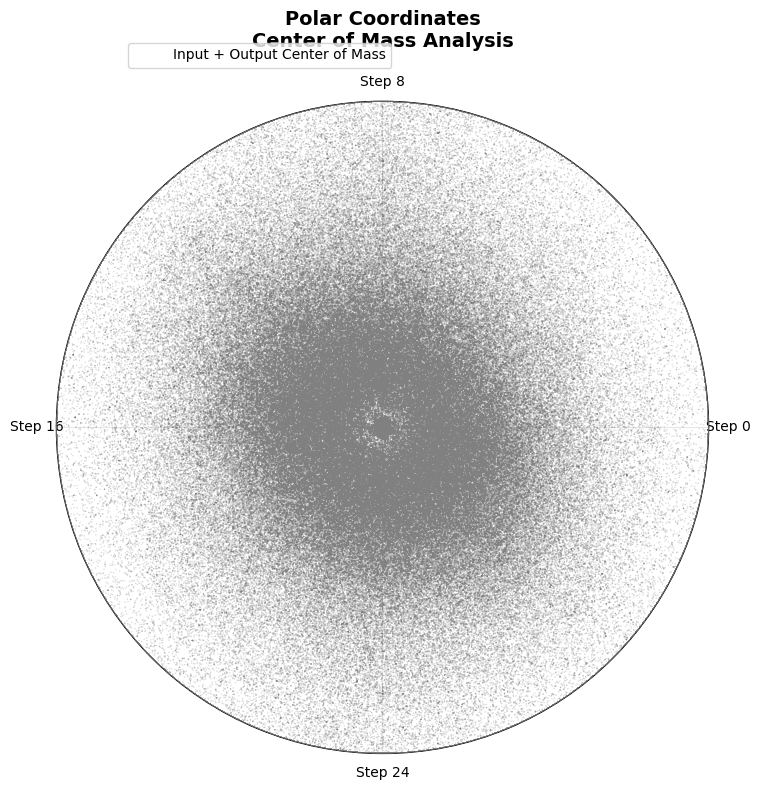

In [8]:
# Plot Center of Mass Distributions
from data.plotting_utils import *
plot_polar_single(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    figsize=(8, 8),
    label="Input + Output Center of Mass",
    color="grey",
    point_size=1,
    point_alpha=0.05
)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x3136d3460>


(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinate Density\nCenter of Mass Distribution'}>,
 array([[ 7955.,   480.,  1308., ...,   450.,   294., 11032.],
        [  584.,   726.,  1063., ...,   408.,   414.,  6061.],
        [ 1026.,   654.,   984., ...,   378.,   342.,  5880.],
        ...,
        [ 1350.,   882.,  1212., ...,   468.,   414.,  9348.],
        [ 2244.,   654.,  1194., ...,   366.,   492., 14238.],
        [ 7955.,   480.,  1308., ...,   450.,   294., 11032.]]))

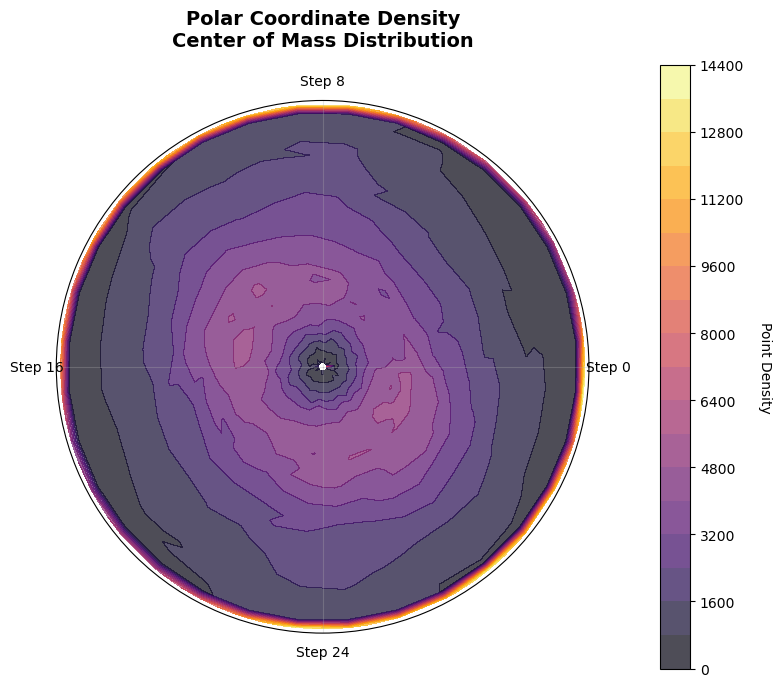

In [19]:
plot_polar_density(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    figsize=(8, 8),
    bins=32,
    radial_bins=32,
    cmap="inferno",
    nonlinear_scale="linear"

)